# ne pas faire un fit lineaire. ne pas faire un fit lineaire. ne pas faire un fit lineaire $\tiny{\text{plz don't hurt me}}$

In [5]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
from uncertainties import unumpy as unp
from uncertainties import ufloat, umath
from options import *
from constants import *

nom_vals = unp.nominal_values
std_devs = unp.std_devs

mpl.rcParams.update(rcParams)

In [6]:
def load(filename: str):
    return pd.read_csv(filename)

In [7]:
acier_doux = load('../data/acier_doux_temp.csv')

## Plot this shit

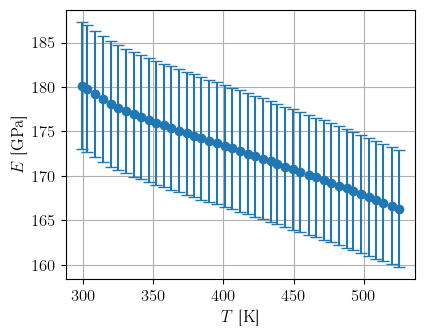

In [8]:
E_auto = acier_doux['E[Pa]'] * 1e-9  # GPa

freq = unp.uarray(acier_doux['Fres[Hz]'], acier_doux['Fres_std[Hz]'])
E_err = 0.943 * (acier_doux_densite * 1e3) * (acier_doux_longueur * 1e-3)**4 * freq**2 / ((acier_doux_epaisseur * 1e-3)**2)
E_err *= 1e-9  # GPa

T = acier_doux['T[C]'] + 273.15

# A voir: faire avec fill_between plutot? (suffisament de mesures)
idx = np.arange(0, len(T), 32)
T_subset = T[idx]
E_err_subset = E_err[idx]

plt.errorbar(T_subset, nom_vals(E_err_subset), yerr=std_devs(E_err_subset), fmt='.')
plt.xlabel(r'$T$ [\si{\kelvin}]')
plt.ylabel(r'$E$ [\si{\giga\pascal}]')
plt.grid()
plt.savefig('../figures/acier_doux_module_young_temp.pdf')